<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Исследование-моделей" data-toc-modified-id="Исследование-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследование моделей</a></span></li><li><span><a href="#Тестирование-моделей" data-toc-modified-id="Тестирование-моделей-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование моделей</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

<div class="alert alert-info">
Подключим библиотеки
</div>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import (
    accuracy_score, 
    f1_score, 
    recall_score, 
    precision_score, 
    roc_auc_score, 
    roc_curve, 
    confusion_matrix
)
import re
import warnings
warnings.filterwarnings('ignore')
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt

<div class="alert alert-info">
    Загрузим датафрейм и уберем пустые записи
</div>

In [3]:
data = pd.read_csv('/datasets/Churn.csv')
data = data.dropna()

<div class="alert alert-info">
<b>v.2</b> Убирать пустые значения очень важно, потому что мне кажется, что когда мы разделяем выборки - в одной части могут оказаться слишком много пустых значений, а это может повлиять на результат обучения модели. на основе этого мы можем допустить ошибку и сделать неправильные выводы
</div>

<div class="alert alert-info">
Посмотрим общую информацию о представленном датафрейме
</div>

In [4]:
print('В представленном датафрейме:', data.shape[0], 'строк и', data.shape[1], 'столбцов\nКоличество дубликатов:', data.duplicated().sum())

В представленном датафрейме: 9091 строк и 14 столбцов
Количество дубликатов: 0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9091 non-null   int64  
 1   CustomerId       9091 non-null   int64  
 2   Surname          9091 non-null   object 
 3   CreditScore      9091 non-null   int64  
 4   Geography        9091 non-null   object 
 5   Gender           9091 non-null   object 
 6   Age              9091 non-null   int64  
 7   Tenure           9091 non-null   float64
 8   Balance          9091 non-null   float64
 9   NumOfProducts    9091 non-null   int64  
 10  HasCrCard        9091 non-null   int64  
 11  IsActiveMember   9091 non-null   int64  
 12  EstimatedSalary  9091 non-null   float64
 13  Exited           9091 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.0+ MB


In [6]:
check = data.describe(include='all').transpose()
check

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,9091.0,NaN,NaN,NaN,5013.909911,2884.433466,1.0,2521.5,5019.0,7511.5,9999.0
CustomerId,9091.0,NaN,NaN,NaN,15691053.156308,71614.191982,15565701.0,15628985.5,15691061.0,15752851.5,15815660.0
Surname,9091,2787,Smith,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,9091.0,NaN,NaN,NaN,650.736553,96.410471,350.0,584.0,652.0,717.0,850.0
Geography,9091,3,France,4550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,9091,2,Male,4974,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,9091.0,NaN,NaN,NaN,38.949181,10.555581,18.0,32.0,37.0,44.0,92.0
Tenure,9091.0,NaN,NaN,NaN,4.99769,2.894723,0.0,2.0,5.0,7.0,10.0
Balance,9091.0,NaN,NaN,NaN,76522.740015,62329.528576,0.0,0.0,97318.25,127561.89,250898.09
NumOfProducts,9091.0,NaN,NaN,NaN,1.530195,0.581003,1.0,1.0,1.0,2.0,4.0


In [7]:
display(data)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,15719294,Wood,800,France,Female,29,2.0,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1


<div class="alert alert-info">
Можно заметить, что заголовки колонок начинаются с большой буквы, поэтому проведем корректировку названий
</div>

In [8]:
data.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).lower() for i in data.columns]

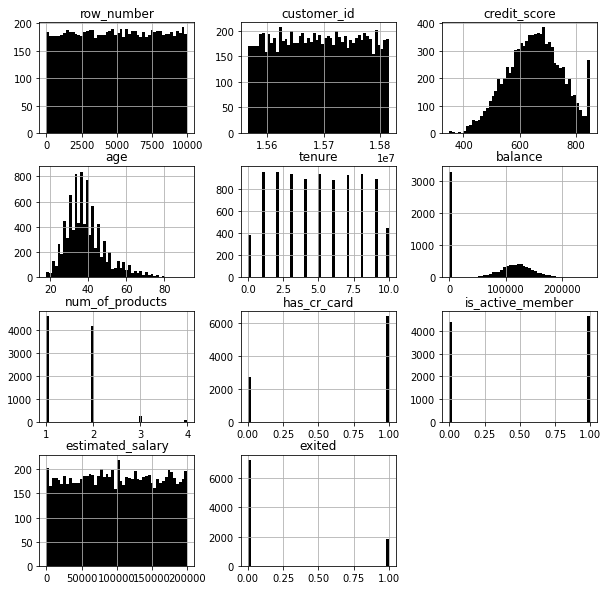

In [9]:
data.hist(figsize=(10, 10), bins = 50, color='black');

In [10]:
for column in data:
    print(column)
    print(data[column].value_counts())
    print('__________________________')

row_number
2049    1
6822    1
669     1
6814    1
4767    1
       ..
1322    1
7465    1
5416    1
9510    1
2047    1
Name: row_number, Length: 9091, dtype: int64
__________________________
customer_id
15646720    1
15758035    1
15796015    1
15768270    1
15785042    1
           ..
15762762    1
15745433    1
15814757    1
15635776    1
15812607    1
Name: customer_id, Length: 9091, dtype: int64
__________________________
surname
Smith           30
Martin          27
Scott           26
Genovese        25
Walker          25
                ..
Cowger           1
Frederickson     1
Castella         1
Fomina           1
Hannam           1
Name: surname, Length: 2787, dtype: int64
__________________________
credit_score
850    210
678     60
655     51
705     48
683     47
      ... 
382      1
351      1
367      1
383      1
376      1
Name: credit_score, Length: 458, dtype: int64
__________________________
geography
France     4550
Germany    2293
Spain      2248
Name: geography, 

<div class="alert alert-info">
<ul>
    <li><b>row_number</b> — индекс строки в данных</li>
    <li><b>customer_id</b> — уникальный идентификатор клиента</li>
    <li><b>surname</b> — фамилия</li>
    <li><b>credit_score</b> — кредитный рейтинг</li>
    <li><b>geography</b> — страна проживания</li>
    <li><b>gender</b> — пол</li>
    <li><b>age</b> — возраст</li>
    <li><b>tenure</b> — сколько лет человек является клиентом банка</li>
    <li><b>balance</b> — баланс на счёте</li>
    <li><b>num_of_products</b> — количество продуктов банка, используемых клиентом</li>
    <li><b>has_cr_card</b> — наличие кредитной карты</li>
    <li><b>is_active_member</b> — активность клиента</li>
    <li><b>estimated_salary</b> — предполагаемая зарплата</li>
</ul>
</div>

<div class="alert alert-info">
<b>Целевой признак</b>
<ul>
    <li><b>exited</b> — факт ухода клиента</li>
</ul>
</div>

<div class="alert alert-info">
Столбцы: <b>row_number, customer_id, surname</b> можно удалить т.к. они не являются ни количественными, ни категориальными признаками для обучения будущей модели
</div>

In [11]:
data = data.drop(['row_number', 'customer_id', 'surname'], axis = 1)

<div class="alert alert-info">
Преобразуем категориальные признаки в количественные методом ONE HOT ENCODER
</div>

In [12]:
data_ohe = pd.get_dummies(data, drop_first=True)

In [13]:
display(data)

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9994,800,France,Female,29,2.0,0.00,2,0,0,167773.55,0
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1


In [14]:
display(data_ohe)

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,800,29,2.0,0.00,2,0,0,167773.55,0,0,0,0
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0


<div class="alert alert-info">
Разделим датафрейм на признаки и целевой признак
</div>

In [15]:
features = data_ohe.drop('exited', axis=1)
target = data_ohe['exited']

<div class="alert alert-info">
сформируем выборки обуч - 60, валид - 20 и тест 20
</div>

In [16]:
features_train, features_validtest, target_train, target_validtest = train_test_split(features, target, train_size=0.6, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_validtest, target_validtest, train_size=0.5, random_state=12345)

<div class="alert alert-info">
в итоге
</div>

In [17]:
print('Исходные данные', data_ohe.shape)
print('')
print('Train:', features_train.shape, ' - ', "{:.0%}".format(features_train.shape[0] / data_ohe.shape[0]))
print('Valid:', features_valid.shape, ' - ', "{:.0%}".format(features_valid.shape[0] / data_ohe.shape[0]))
print('Test:', features_test.shape, ' - ', "{:.0%}".format(features_test.shape[0] / data_ohe.shape[0]))

Исходные данные (9091, 12)

Train: (5454, 11)  -  60%
Valid: (1818, 11)  -  20%
Test: (1819, 11)  -  20%


## Исследование задачи

<div class="alert alert-info">
Пройдемся по трем методам. о борьбе с дисбалансом будем думать на следующем шаге.
Для обучения модели методом случайного леса или древом решений нужно преобразовать категориальные признаки и нужно провести порядковое кодирование
</div>

In [18]:
#encoder = OrdinalEncoder()
#data_ordinal = pd.DataFrame(encoder.fit_transform(data), columns = data.columns)

In [19]:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])    

StandardScaler()

<div class="alert alert-info">
Преобразуем выборки
</div>

In [20]:
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

<div class="alert alert-info">
<b>v.2</b> Мы преобразовываем выборки для стандартизации числовых признаков в данных, по сути это делается для того, чтобы данные можно было бы нормализовать и привести к одному масштабу, эти данные помогут модели учиться и использовать их в качестве критериев для вычислений
</div>

<div class="alert alert-info">
<b>Древо решений</b> - определяем лучший параметр max_depth
</div>

In [21]:
for depth in range(2, 31, 1):
    model_tree = DecisionTreeClassifier(max_depth = depth, random_state=1234).fit(features_train, target_train)
    prediction = model_tree.predict(features_valid)
    prediction_proba = model_tree.predict_proba(features_valid)
    roc_auc = round(roc_auc_score(target_valid, prediction_proba[:,1]), 2)
    print('max_depth - [', depth, '] F1_score - [', round(f1_score(target_valid, prediction),2), '], ROC_AUC - [', roc_auc, ']')

max_depth - [ 2 ] F1_score - [ 0.53 ], ROC_AUC - [ 0.76 ]
max_depth - [ 3 ] F1_score - [ 0.37 ], ROC_AUC - [ 0.8 ]
max_depth - [ 4 ] F1_score - [ 0.54 ], ROC_AUC - [ 0.82 ]
max_depth - [ 5 ] F1_score - [ 0.51 ], ROC_AUC - [ 0.85 ]
max_depth - [ 6 ] F1_score - [ 0.56 ], ROC_AUC - [ 0.85 ]
max_depth - [ 7 ] F1_score - [ 0.58 ], ROC_AUC - [ 0.84 ]
max_depth - [ 8 ] F1_score - [ 0.55 ], ROC_AUC - [ 0.81 ]
max_depth - [ 9 ] F1_score - [ 0.55 ], ROC_AUC - [ 0.8 ]
max_depth - [ 10 ] F1_score - [ 0.52 ], ROC_AUC - [ 0.76 ]
max_depth - [ 11 ] F1_score - [ 0.52 ], ROC_AUC - [ 0.72 ]
max_depth - [ 12 ] F1_score - [ 0.47 ], ROC_AUC - [ 0.7 ]
max_depth - [ 13 ] F1_score - [ 0.48 ], ROC_AUC - [ 0.68 ]
max_depth - [ 14 ] F1_score - [ 0.47 ], ROC_AUC - [ 0.67 ]
max_depth - [ 15 ] F1_score - [ 0.48 ], ROC_AUC - [ 0.67 ]
max_depth - [ 16 ] F1_score - [ 0.48 ], ROC_AUC - [ 0.68 ]
max_depth - [ 17 ] F1_score - [ 0.47 ], ROC_AUC - [ 0.67 ]
max_depth - [ 18 ] F1_score - [ 0.48 ], ROC_AUC - [ 0.68 ]
max_dept

<div class="alert alert-info">
Вывод: 
<br>
лучший параметр max_depth - <b>7</b>
<br>
F1_score - <b>0.58</b>
<br>
ROC_AUC - <b>0.84</b>
</div>

<div class="alert alert-info">
<b>Случайный лес</b> - определяем лучший параметр max_depth, n_estimators, roc_auc
</div>

In [40]:
best_f1 = 0
best_roc_auc = 0
for est in range(1, 51, 1):
    for depth in range(1, 15):
        model_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_forest.fit(features_train, target_train)
        prediction = model_forest.predict(features_valid)
        f1 = round(f1_score(target_valid, prediction), 2)
        prediction_proba = model_forest.predict_proba(features_valid)
        roc_auc = round(roc_auc_score(target_valid, prediction_proba[:,1]), 2)
        print('n_estimators - [', est, '] max_depth - [', depth, '] F1_score - [', f1, '] ROC_AUC - [', roc_auc, ']')
        if f1 > best_f1:
            best_f1 = f1
        if roc_auc > best_roc_auc:
            best_roc_auc = roc_auc
print()
print("Лучший результат F1_score - [", best_f1, ']')
print("Лучший показатель ROC_AUC - [", best_roc_auc, ']')

n_estimators - [ 1 ] max_depth - [ 1 ] F1_score - [ 0.26 ] ROC_AUC - [ 0.57 ]
n_estimators - [ 1 ] max_depth - [ 2 ] F1_score - [ 0.26 ] ROC_AUC - [ 0.67 ]
n_estimators - [ 1 ] max_depth - [ 3 ] F1_score - [ 0.25 ] ROC_AUC - [ 0.74 ]
n_estimators - [ 1 ] max_depth - [ 4 ] F1_score - [ 0.57 ] ROC_AUC - [ 0.79 ]
n_estimators - [ 1 ] max_depth - [ 5 ] F1_score - [ 0.47 ] ROC_AUC - [ 0.8 ]
n_estimators - [ 1 ] max_depth - [ 6 ] F1_score - [ 0.48 ] ROC_AUC - [ 0.8 ]
n_estimators - [ 1 ] max_depth - [ 7 ] F1_score - [ 0.51 ] ROC_AUC - [ 0.78 ]
n_estimators - [ 1 ] max_depth - [ 8 ] F1_score - [ 0.55 ] ROC_AUC - [ 0.79 ]
n_estimators - [ 1 ] max_depth - [ 9 ] F1_score - [ 0.53 ] ROC_AUC - [ 0.78 ]
n_estimators - [ 1 ] max_depth - [ 10 ] F1_score - [ 0.54 ] ROC_AUC - [ 0.75 ]
n_estimators - [ 1 ] max_depth - [ 11 ] F1_score - [ 0.52 ] ROC_AUC - [ 0.72 ]
n_estimators - [ 1 ] max_depth - [ 12 ] F1_score - [ 0.53 ] ROC_AUC - [ 0.72 ]
n_estimators - [ 1 ] max_depth - [ 13 ] F1_score - [ 0.49 ] ROC

<div class="alert alert-info">
Вывод:
<br>
лучший параметр F1_score - <b>0.59</b>
<br>
лучший параметр max_depth - <b>14</b>
<br>
лучший параметр n_estimators - <b>23</b>
<br>
лучший показатель ROC_AUC - <b>0.87</b>
</div>

<div class="alert alert-info">
<b>Логистическая регрессия</b>
</div>

In [23]:
model_log_reg = LogisticRegression().fit(features_train, target_train)
prediction = model_log_reg.predict(features_valid)
prediction_proba = model_log_reg.predict_proba(features_valid)
roc_auc = round(roc_auc_score(target_valid, prediction_proba[:,1]), 2)
print('F1_score:', round(f1_score(target_valid, prediction), 2))
print('ROC_AUC:', roc_auc)

F1_score: 0.3
ROC_AUC: 0.77


<div class="alert alert-info">
<b>Общий вывод</b> - самое положительное значение было в <b>Случайный лес</b> при max_depth = 5 и n_estimators = 20, F1_score: 0.52, ROC_AUC: 0.86
</div>

## Борьба с дисбалансом

In [24]:
def upsampling (features, target, repeat):
    target_one=target[target==1]
    target_null=target[target==0]
    features_one=features[target==1]
    features_null=features[target==0]
    
    upsampling_features = pd.concat([features_null] + [features_one] * repeat)
    upsampling_target = pd.concat([target_null] + [target_one] * repeat)
    
    upsampling_features, upsampling_target = shuffle(upsampling_features, upsampling_target, random_state = 1234)
    
    return upsampling_features, upsampling_target

In [25]:
features_balance_up, target_balance_up = upsampling(features_train, target_train, 4)

In [26]:
def downsampling(features, target, fraction):
    features_null=features[target==0]
    features_one=features[target==1]
    target_null=target[target==0]
    target_one=target[target==1]
    
    downsampling_features = pd.concat([features_null.sample(frac = fraction, random_state = 1234)] + [features_one])
    downsampling_target = pd.concat([target_null.sample(frac = fraction, random_state = 1234)] + [target_one])
    
    downsampling_features, downsampling_target = shuffle(downsampling_features, downsampling_target, random_state = 1234)
    return downsampling_features, downsampling_target

In [27]:
features_balance_down, target_balance_down = downsampling(features, target, 0.25)

## Исследование моделей

<div class="alert alert-info">
<b>Древо решений</b>
</div>

In [28]:
for depth in range(1, 50, 1):
    model_tree = DecisionTreeClassifier(max_depth = depth, random_state=1234).fit(features_balance_down, target_balance_down)
    prediction = model_tree.predict(features_valid)
    prediction_proba = model_tree.predict_proba(features_valid)
    roc_auc = round(roc_auc_score(target_valid, prediction_proba[:,1]), 2)
    print('max_depth - [', depth, '] F1_score - [', round(f1_score(target_valid, prediction),2), '], ROC_AUC - [', roc_auc, ']')

max_depth - [ 1 ] F1_score - [ 0.0 ], ROC_AUC - [ 0.5 ]
max_depth - [ 2 ] F1_score - [ 0.26 ], ROC_AUC - [ 0.57 ]
max_depth - [ 3 ] F1_score - [ 0.26 ], ROC_AUC - [ 0.57 ]
max_depth - [ 4 ] F1_score - [ 0.34 ], ROC_AUC - [ 0.64 ]
max_depth - [ 5 ] F1_score - [ 0.27 ], ROC_AUC - [ 0.48 ]
max_depth - [ 6 ] F1_score - [ 0.26 ], ROC_AUC - [ 0.48 ]
max_depth - [ 7 ] F1_score - [ 0.25 ], ROC_AUC - [ 0.66 ]
max_depth - [ 8 ] F1_score - [ 0.26 ], ROC_AUC - [ 0.48 ]
max_depth - [ 9 ] F1_score - [ 0.26 ], ROC_AUC - [ 0.57 ]
max_depth - [ 10 ] F1_score - [ 0.26 ], ROC_AUC - [ 0.57 ]
max_depth - [ 11 ] F1_score - [ 0.43 ], ROC_AUC - [ 0.64 ]
max_depth - [ 12 ] F1_score - [ 0.26 ], ROC_AUC - [ 0.57 ]
max_depth - [ 13 ] F1_score - [ 0.26 ], ROC_AUC - [ 0.57 ]
max_depth - [ 14 ] F1_score - [ 0.26 ], ROC_AUC - [ 0.57 ]
max_depth - [ 15 ] F1_score - [ 0.26 ], ROC_AUC - [ 0.57 ]
max_depth - [ 16 ] F1_score - [ 0.45 ], ROC_AUC - [ 0.65 ]
max_depth - [ 17 ] F1_score - [ 0.26 ], ROC_AUC - [ 0.57 ]
max_dept

<div class="alert alert-info">
ROC_AUC: 0.66 при max_depth - 7
<br>
F1_score: 0.25
</div>

In [29]:
for depth in range(1, 50, 1):
    model_tree = DecisionTreeClassifier(max_depth = depth, random_state=1234).fit(features_balance_up, target_balance_up)
    prediction = model_tree.predict(features_valid)
    prediction_proba = model_tree.predict_proba(features_valid)
    roc_auc = round(roc_auc_score(target_valid, prediction_proba[:,1]), 2)
    print('max_depth - [', depth, '] F1_score - [', round(f1_score(target_valid, prediction),2), '], ROC_AUC - [', roc_auc, ']')

max_depth - [ 1 ] F1_score - [ 0.51 ], ROC_AUC - [ 0.71 ]
max_depth - [ 2 ] F1_score - [ 0.53 ], ROC_AUC - [ 0.76 ]
max_depth - [ 3 ] F1_score - [ 0.55 ], ROC_AUC - [ 0.79 ]
max_depth - [ 4 ] F1_score - [ 0.55 ], ROC_AUC - [ 0.82 ]
max_depth - [ 5 ] F1_score - [ 0.57 ], ROC_AUC - [ 0.84 ]
max_depth - [ 6 ] F1_score - [ 0.56 ], ROC_AUC - [ 0.83 ]
max_depth - [ 7 ] F1_score - [ 0.54 ], ROC_AUC - [ 0.81 ]
max_depth - [ 8 ] F1_score - [ 0.56 ], ROC_AUC - [ 0.79 ]
max_depth - [ 9 ] F1_score - [ 0.51 ], ROC_AUC - [ 0.76 ]
max_depth - [ 10 ] F1_score - [ 0.51 ], ROC_AUC - [ 0.73 ]
max_depth - [ 11 ] F1_score - [ 0.52 ], ROC_AUC - [ 0.72 ]
max_depth - [ 12 ] F1_score - [ 0.5 ], ROC_AUC - [ 0.69 ]
max_depth - [ 13 ] F1_score - [ 0.49 ], ROC_AUC - [ 0.68 ]
max_depth - [ 14 ] F1_score - [ 0.47 ], ROC_AUC - [ 0.67 ]
max_depth - [ 15 ] F1_score - [ 0.48 ], ROC_AUC - [ 0.67 ]
max_depth - [ 16 ] F1_score - [ 0.46 ], ROC_AUC - [ 0.66 ]
max_depth - [ 17 ] F1_score - [ 0.46 ], ROC_AUC - [ 0.66 ]
max_dep

<div class="alert alert-info">
ROC_AUC: 0.84 при max_depth - 5
<br>
F1_score: 0.57
</div>

<div class="alert alert-info">
<b>v.2</b> убрал class_weight='balanced'. будем использовать только апсемплинг для балансировки классов и производить оценку качества модели с помощью F-1 меры
</div>

<div class="alert alert-info">
<b>Случайный лес</b>
</div>

In [41]:
best_f1 = 0
best_roc_auc = 0
for est in range(1, 23, 1):
    for depth in range(1, 14):
        model_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_forest.fit(features_balance_down, target_balance_down)
        prediction = model_forest.predict(features_valid)
        f1 = round(f1_score(target_valid, prediction), 2)
        prediction_proba = model_forest.predict_proba(features_valid)
        roc_auc = round(roc_auc_score(target_valid, prediction_proba[:,1]), 2)
        print('n_estimators - [', est, '] max_depth - [', depth, '] F1_score - [', f1, '] ROC_AUC - [', roc_auc, ']')
        if f1 > best_f1:
            best_f1 = f1
        if roc_auc > best_roc_auc:
            best_roc_auc = roc_auc
print()
print("Лучший результат F1_score - [", best_f1, ']')
print("Лучший показатель ROC_AUC - [", best_roc_auc, ']')

n_estimators - [ 1 ] max_depth - [ 1 ] F1_score - [ 0.26 ] ROC_AUC - [ 0.57 ]
n_estimators - [ 1 ] max_depth - [ 2 ] F1_score - [ 0.45 ] ROC_AUC - [ 0.67 ]
n_estimators - [ 1 ] max_depth - [ 3 ] F1_score - [ 0.45 ] ROC_AUC - [ 0.67 ]
n_estimators - [ 1 ] max_depth - [ 4 ] F1_score - [ 0.3 ] ROC_AUC - [ 0.33 ]
n_estimators - [ 1 ] max_depth - [ 5 ] F1_score - [ 0.31 ] ROC_AUC - [ 0.35 ]
n_estimators - [ 1 ] max_depth - [ 6 ] F1_score - [ 0.34 ] ROC_AUC - [ 0.43 ]
n_estimators - [ 1 ] max_depth - [ 7 ] F1_score - [ 0.27 ] ROC_AUC - [ 0.41 ]
n_estimators - [ 1 ] max_depth - [ 8 ] F1_score - [ 0.25 ] ROC_AUC - [ 0.39 ]
n_estimators - [ 1 ] max_depth - [ 9 ] F1_score - [ 0.25 ] ROC_AUC - [ 0.39 ]
n_estimators - [ 1 ] max_depth - [ 10 ] F1_score - [ 0.27 ] ROC_AUC - [ 0.42 ]
n_estimators - [ 1 ] max_depth - [ 11 ] F1_score - [ 0.34 ] ROC_AUC - [ 0.5 ]
n_estimators - [ 1 ] max_depth - [ 12 ] F1_score - [ 0.32 ] ROC_AUC - [ 0.47 ]
n_estimators - [ 1 ] max_depth - [ 13 ] F1_score - [ 0.32 ] ROC

<div class="alert alert-info">
ROC_AUC: 0.73 при max_depth - 2 и n_estimators - 120
<br>
F1_score: 0.46
</div>

In [42]:
best_f1 = 0
best_roc_auc = 0
for est in range(1, 23, 1):
    for depth in range(1, 14):
        model_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_forest.fit(features_balance_up, target_balance_up)
        prediction = model_forest.predict(features_valid)
        f1 = round(f1_score(target_valid, prediction), 2)
        prediction_proba = model_forest.predict_proba(features_valid)
        roc_auc = round(roc_auc_score(target_valid, prediction_proba[:,1]), 2)
        print('n_estimators - [', est, '] max_depth - [', depth, '] F1_score - [', f1, '] ROC_AUC - [', roc_auc, ']')
        if f1 > best_f1:
            best_f1 = f1
        if roc_auc > best_roc_auc:
            best_roc_auc = roc_auc
print()
print("Лучший результат F1_score - [", best_f1, ']')
print("Лучший показатель ROC_AUC - [", best_roc_auc, ']')

n_estimators - [ 1 ] max_depth - [ 1 ] F1_score - [ 0.38 ] ROC_AUC - [ 0.6 ]
n_estimators - [ 1 ] max_depth - [ 2 ] F1_score - [ 0.42 ] ROC_AUC - [ 0.7 ]
n_estimators - [ 1 ] max_depth - [ 3 ] F1_score - [ 0.53 ] ROC_AUC - [ 0.77 ]
n_estimators - [ 1 ] max_depth - [ 4 ] F1_score - [ 0.55 ] ROC_AUC - [ 0.82 ]
n_estimators - [ 1 ] max_depth - [ 5 ] F1_score - [ 0.57 ] ROC_AUC - [ 0.83 ]
n_estimators - [ 1 ] max_depth - [ 6 ] F1_score - [ 0.52 ] ROC_AUC - [ 0.79 ]
n_estimators - [ 1 ] max_depth - [ 7 ] F1_score - [ 0.58 ] ROC_AUC - [ 0.81 ]
n_estimators - [ 1 ] max_depth - [ 8 ] F1_score - [ 0.56 ] ROC_AUC - [ 0.77 ]
n_estimators - [ 1 ] max_depth - [ 9 ] F1_score - [ 0.58 ] ROC_AUC - [ 0.79 ]
n_estimators - [ 1 ] max_depth - [ 10 ] F1_score - [ 0.54 ] ROC_AUC - [ 0.77 ]
n_estimators - [ 1 ] max_depth - [ 11 ] F1_score - [ 0.5 ] ROC_AUC - [ 0.71 ]
n_estimators - [ 1 ] max_depth - [ 12 ] F1_score - [ 0.53 ] ROC_AUC - [ 0.7 ]
n_estimators - [ 1 ] max_depth - [ 13 ] F1_score - [ 0.5 ] ROC_AU

<div class="alert alert-info">
ROC_AUC: 0.87 при max_depth - 10 и n_estimators - 70
<br>
F1_score: 0.63
</div>

<div class="alert alert-info">
<b>Логистическая регрессия</b>
</div>

In [32]:
model_log_reg = LogisticRegression().fit(features_balance_down, target_balance_down)
prediction = model_log_reg.predict(features_valid)
prediction_proba = model_log_reg.predict_proba(features_valid)
roc_auc = round(roc_auc_score(target_valid, prediction_proba[:,1]), 2)
print('F1_score:', round(f1_score(target_valid, prediction), 2))
print('ROC_AUC:', roc_auc)

F1_score: 0.5
ROC_AUC: 0.75


In [33]:
model_log_reg = LogisticRegression().fit(features_balance_up, target_balance_up)
prediction = model_log_reg.predict(features_valid)
prediction_proba = model_log_reg.predict_proba(features_valid)
roc_auc = round(roc_auc_score(target_valid, prediction_proba[:,1]), 2)
print('F1_score:', round(f1_score(target_valid, prediction), 2))
print('ROC_AUC:', roc_auc)

F1_score: 0.51
ROC_AUC: 0.78


<div class="alert alert-info">
<b>Изучение метрики AUC-ROC</b>
</div>

<div class="alert alert-info">
Случайный лес
</div>

In [34]:
auc_roc_check_one = model_forest.predict_proba(features_valid)[:, 1]
auc_roc_check = roc_auc_score(target_valid, auc_roc_check_one)
round(auc_roc_check,2)

0.85

<div class="alert alert-info">
Древо решений
</div>

In [35]:
auc_roc_check_two = model_tree.predict_proba(features_valid)[:, 1]
auc_roc_check2 = roc_auc_score(target_valid, auc_roc_check_two)
round(auc_roc_check2, 2)

0.67

<div class="alert alert-info">
Логистическая регрессия
</div>

In [36]:
auc_roc_check_three = model_log_reg.predict_proba(features_valid)[:, 1]
auc_roc_check3 = roc_auc_score(target_valid, auc_roc_check_three)
round(auc_roc_check3, 2)

0.78

## Тестирование моделей

In [37]:
dummy_model = DummyClassifier(strategy='constant', constant=1)
dummy_model.fit(features_train, target_train)
print('F1_score для дамми модели:', round(f1_score(dummy_model.predict(features_test), target_test), 2))

F1_score для дамми модели: 0.32


<div class="alert alert-info">
Случайный лес
</div>

In [38]:
model_forest_final = RandomForestClassifier(max_depth = 14, n_estimators = 180, random_state=1234)
model_forest_final.fit(features_balance_up, target_balance_up)
model_forest_final_prediction = model_forest_final.predict(features_test)
f1 = round(f1_score(target_test, model_forest_final_prediction), 2)
prediction_proba_final = model_forest_final.predict_proba(features_test)
roc_auc = round(roc_auc_score(target_test, prediction_proba_final[:,1]), 2)
print('n_estimators - [10] max_depth - [5] F1_score - [', f1, '] ROC_AUC - [', roc_auc, ']')

n_estimators - [10] max_depth - [5] F1_score - [ 0.62 ] ROC_AUC - [ 0.85 ]


<div class="alert alert-info">
Нарисуем кривую ROC_AUC
</div>

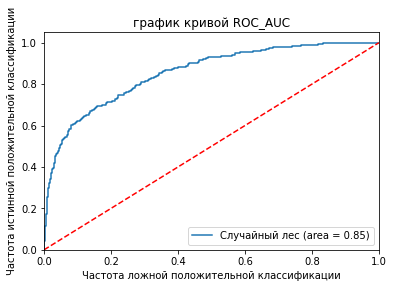

In [39]:
fpr, tpr, thresholds = roc_curve(target_test, prediction_proba_final[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Случайный лес (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Частота ложной положительной классификации')
plt.ylabel('Частота истинной положительной классификации')
plt.title('график кривой ROC_AUC')
plt.legend(loc="lower right")
plt.show()

<div class="alert alert-info">
В общем итоге модель случайный лес показывает лучшие результаты, чем константная модель.
<br>
<br>
f1_score: 0.62
<br>
<b>Почти в два раза!</b>
<br>
<br>
Мы использовали библиотеку scikit-learn для обучения и оценки различных моделей классификации, таких как древо решений, случайный лес и логистическая регрессия. мы загрузили данные из csv файлика, посмотрели что там внутри есть, очистили от всяких левых значений и на его основе создали несколько выборок (с помощью функции train_test_split). Далее мы обучили модели и оценили их с помощью метрик F1_score и ROC_AUC.
</div>